# Programming Lab 1 

## Handout 3

## Lara Schmalenstroer (s0laschm@uni-bonn.de)

### Ex.1 (0 pts) Matrices as lists of lists
##### The previously mentioned solution for initializing matrices as lists of lists works fine. Now, consider the following modification, which tries to optimize setting up the matrix by initializing a single row of n 0's only once and append this row m times:

row = [0]*n 

mat=[]

for i in range(m):

mat.append(row)

##### or even shorter:

mat=[[0]\*n]\*m 

##### Why are these alternatives wrong? Demonstrate this using an example.

In [1]:
row=[0]*10
mat=[]
for i in range(5):
    mat.append(row)

mat

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [2]:
mat[0][0]=3
mat

[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

When implementing the matrix in the suggested way, it seems to work fine. But due to the fact that the matrix contains the same object (row) 5 times, a modification in one row of the matrix changes the row object and thus every row of the matrix. If we used this way of implementing a matrix for the dotplot we'd wrong results since a modification of one line would modify each row of the matrix.

### Ex.2 (20 pts) The Dotplot matrix 
##### a) Generate dotplot matrix (4 pts)

##### Write a function dotplot(seqA,seqB,w,s)that takes four parameters:  two DNA or amino-acid sequences and two parameters w and s for the window size and stringency. The function should return a matrix where the number of rows (1st dimension) corresponds to the length of seq A and number of columns (2nd dimension) corresponding to the length of seq B. The matrix elements corresponding to positons i in seq A and j in seq B should contain 1 if at least s of the pairs of symbols in the windows of size w around position i and j match.  Otherwise, it should contain 0.  (Note:In some definitions of dotplots it is required that symbols at position i and j must always match regrardless of window size and stringency.  Feel free to add this additional condition to your implementation.)

In [3]:
import numpy as np
def dotplot(seqA,seqB,w=1,s=1):
    '''Takes two sequences as input and returns the dotplot matrix. The window size and stringency
    can be specified.
    
    Args: seqA: string of sequence A
          seqB: string of sequence B
          w: window size, default: w=1
          s: stringency, default: s=1'''
    assert w%2==1, 'Please make sure your window size is an odd integer.'
    window=int((w-1)/2)
    #create artificial heads and tails of the sequences to be able to calculate the window for 
    #every position of sequences A and B
    seqA_n=('|'*window)+seqA+('|'*window)
    seqB_n=('-'*window)+seqB+('-'*window)
    plot=np.zeros((len(seqA_n),len(seqB_n)),dtype=int)
    for i in range(len(seqA)):
        partA=seqA_n[i:i+w]
        for j in range(len(seqB)):
            partB=seqB_n[j:j+w]
            count=0
            sets=[{partA[m],partB[m]} for m in range(len(partA))]
            for el in sets:
                if len(el)<2:
                    count+=1
            if count>=s:
                plot[i,j]=1
    return plot[:-4,:-4]
                    

The first approach is not very fast for longer sequences so I tried to implement a faster version. The inner try and except block has a problem that I didn't find, when running the function on two sequences it falls into the except (print("error occured")) case for certain positions. It has also another way of dealing with the border cases.

In [4]:
def create_dotplot(seqA,seqB,w=1,s=1):
    '''Takes two sequences as input and returns the dotplot matrix. The window size and stringency
    can be specified.
    
    Args: seqA: string of sequence A
          seqB: string of sequence B
          w: window size, default: w=1
          s: stringency, default: s=1'''
    assert w%2==1, 'Please make sure your window size is an odd integer.'
    plot=np.zeros((len(seqA),len(seqB)),dtype=int)
    window=int((w-1)/2)
    for i in range(len(seqA)):
        for j in range(len(seqB)):
            if seqA[i]==seqB[j]:
                count=0
                try:
                    partA=seqA[i-window:i+window+1]
                    partB=seqB[j-window:j+window+1]
                    for n in range(len(partA)):
                        if partA[n]==partB[n]:
                            count+=1
                    if count>=s:
                        plot[i,j]=1
                except IndexError:
                    try:
                        if i-window<0 or j-window<0:
                            partA=seqA[:i+window+1]
                            partB=seqB[:j+window+1]
                            diff=len(partA)-len(partB)
                            if diff<0:
                                partB=seqB[j-window+abs(diff):j+window+1]
                            elif diff>0:
                                partA=seqA[i-window+abs(diff):i+window+1]
                            for n in range(len(partA)):
                                if partA[n]==partB[n]:
                                    count+=1
                        elif i+window>len(seqA) or j+window>len(seqB):
                            partA=seqA[i-window:]
                            partB=seqB[j-window:]
                            diff=len(partA)-len(partB)
                            if diff<0:
                                partB=seqB[j-window:j+window+1-abs(diff)]
                            elif diff>0:
                                partA=seqA[i-window:i+window+1-abs(diff)]
                            for n in range(len(partA)):
                                if partA[n]==partB[n]:
                                    count+=1
                        if count>=(s*(len(partA)/w)):
                            plot[i,j]=1
                    except:
                        #print('Error occured')
                        continue
    return plot

In [5]:
seqA="peter piper picked a peck of pickled peppers"
seqB="a peck of pickled peppers peter piper picked"
dp_test = dotplot(seqA,seqB,5,4)
dp_new = create_dotplot(seqA,seqB,5,4)

##### (b) (4 pts) The Dotplot as ASCII art
##### Write a function dotplot2Ascii(dp,seqA,seqB,heading,filename) that takes five parameters: A dotplot matrix dp, the two sequences from which it was generated; heading is a string to be used as title and filename is the name of an output file for the dotplot. The function should create an ASCII dotplot like the one given at the beginning of the handout. You should be able to use the function in the following way: 

seqA="peter piper picked a peck of pickled peppers"

seqB="a peck of pickled peppers peter piper picked"

dp = dotplot(seqA,seqB,5,4)

dotplot2Ascii(dp,seqA,seqB,"Peter Piper's first dotplot","mydotplot.txt")

##### Test your program on lines from the file peter.txt. For the above example you can compare your result to peters-dotplot.txt.

In [6]:
def dotplot2ascii(dp, seqA, seqB, heading, filename):
    '''Takes a dotplot matrix and creates a textfile with a graphical representation of the dotplot.
    
    Args: dp: numpy matrix of the dotplot
          seqA: string of sequence A
          seqB: string of sequence B
          heading: string, title of the plot
          filename: name of the output file, format = .txt'''
    list_dp=[list(dp[i]) for i in range(len(dp))]
    with open(filename,'w') as output:
        output.write(heading.upper()+'\n\n')
        output.write(' |'+seqB+'\n')
        output.write('_+'+'_'*(len(seqB))+'\n')
        for i in range(len(list_dp)):
            string=''
            for j in range(len(list_dp[i])):
                if list_dp[i][j]==1:
                    string+='*'
                else:
                    string+=' '
            output.write(seqA[i]+'|'+string+'\n')
    return

In [7]:
dotplot2ascii(dp_test,seqA,seqB,"Peter Piper's first dotplot",'dotplot.txt')

In [8]:
with open('dotplot.txt','r') as file:
    content=file.read()
print(content)

PETER PIPER'S FIRST DOTPLOT

 |a peck of pickled peppers peter piper picked
_+____________________________________________
p|                                            
e|                           *                
t|                            *               
e|                             *              
r|                              *     *       
 |                               *     *      
p|                                *     *     
i|                                 *          
p|                                  *         
e|                                   *        
r|                              *     *       
 |                               *     *      
p|          *                     *     *     
i|   *       *                           *    
c|            *                           *   
k|                                         *  
e|                                          * 
d|                                            
 |                             

#### (c) (4 pts) Graphical output using matplotlib
##### Write a function dotplot2Graphics(dp,labelA,labelB,heading,filename) that takes a dotplot dp and labels labelA and labelB for identifying the two sequences (e.g., the gene or protein names) as arguments to be used as labels for the y- and x-axis, respectively, and a title for the figure. filename should be the filename for saving the figure. The function should create a dotplot of the figure, save it to a file and display it on screen. (filename should be a filename with a graphics extension that matplotlib understands like .png, .ps, or .pdf.)

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [10]:
def dotplot2Graphics_v1(dp,labelA,labelB,heading,filename):
    '''Takes a dotplot matrix and creates a file with a graphical representation of the dotplot.
    
    Args: dp: numpy matrix of the dotplot
          labelA: string of sequence A
          labelB: string of sequence B
          heading: string, title of the plot
          filename: name of the output file, format = .pdf, .png or .ps'''
    assert filename.endswith('.png') or filename.endswith('.ps') or filename.endswith('.pdf'), \
    'Please enter a valid file extension type, valid types: .pdf, .png or .ps'
    xaxis=[labelB[i] for i in range(len(labelB))]
    yaxis=[labelA[i] for i in range(len(labelA)-1,-1,-1)]
    dp=np.rot90(dp, k=3)
    figure=plt.figure(figsize=(10,10))
    for i in range(len(xaxis)):
        for j in range(len(yaxis)):
            if dp[i,j]==1:
                plt.scatter(i,j,c='black', marker='+')
    if len(labelA)<100 and len(labelB)<100:
        plt.xticks(range(len(xaxis)),xaxis)
        plt.yticks(range(len(yaxis)),yaxis)
    else: 
        plt.xticks(range(len(xaxis)))
        plt.yticks(range(len(yaxis)))
    plt.title(heading, fontsize=15)
    plt.xlabel(labelB, fontsize=12)
    plt.ylabel(labelA, fontsize=12)
    plt.show()
    figure.savefig(filename)
    return

In [11]:
def dotplot2Graphics_v2(dp,labelA,labelB,heading,filename):
    '''Takes a dotplot matrix and creates a file with a graphical representation of the dotplot.
    
    Args: dp: numpy matrix of the dotplot
          labelA: string of sequence A
          labelB: string of sequence B
          heading: string, title of the plot
          filename: name of the output file, format = .pdf, .png or .ps'''
    assert filename.endswith('.png') or filename.endswith('.ps') or filename.endswith('.pdf'), \
    'Please enter a valid file extension type, valid types: .pdf, .png or .ps'
    figure = plt.figure(figsize=(10,10))
    axes = figure.add_subplot(111)
    xaxis = [labelB[i] for i in range(len(labelB))]
    yaxis = [labelA[i] for i in range(len(labelA))]
    caxes = axes.matshow(dp, cmap ='binary')
    plt.xlabel(labelB, fontsize=12)
    plt.ylabel(labelA, fontsize=12)
    plt.xticks(range(len(xaxis)),xaxis)
    plt.yticks(range(len(yaxis)),yaxis)
    plt.title(heading, fontsize=15)
    plt.show()
    figure.savefig(filename)
    return 

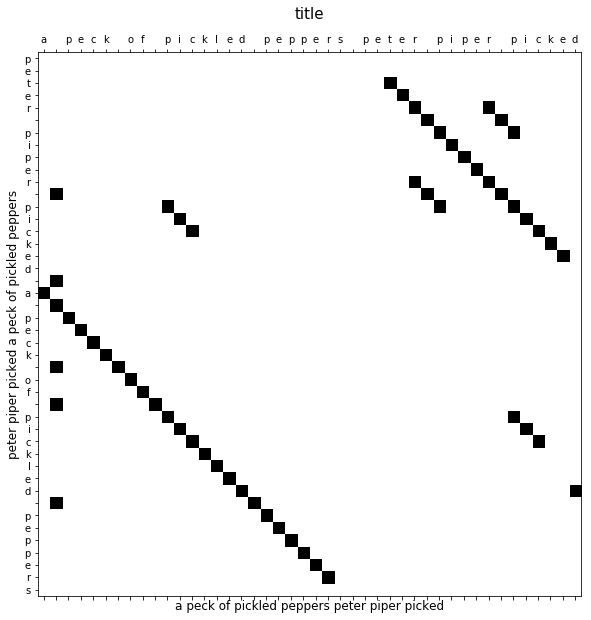

In [12]:
dotplot2Graphics_v2(dp_new,seqA,seqB,'title','test1.pdf')

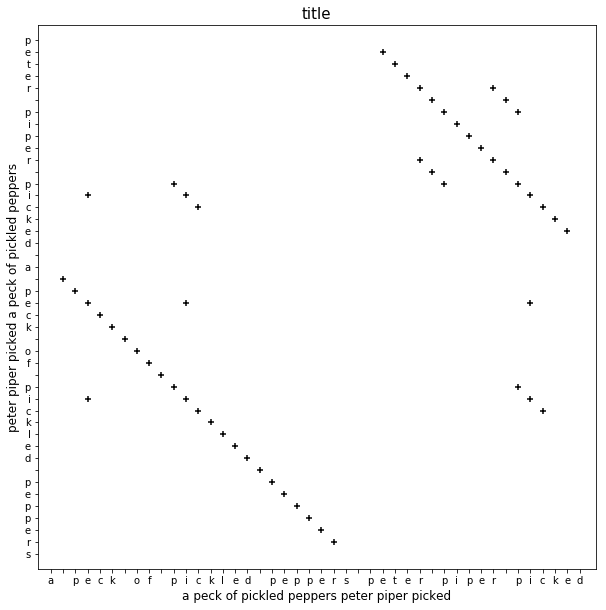

In [13]:
dotplot2Graphics_v1(dp_test,seqA,seqB,'title','test3.pdf')

#### (e) (4 pts) Generate some nice dotplots
##### Generate dotplots for the following two pairs of sequences.

I had problems with the download of the human pax file (it was empty somehow) so I compared the mouse pax sequence with itself.

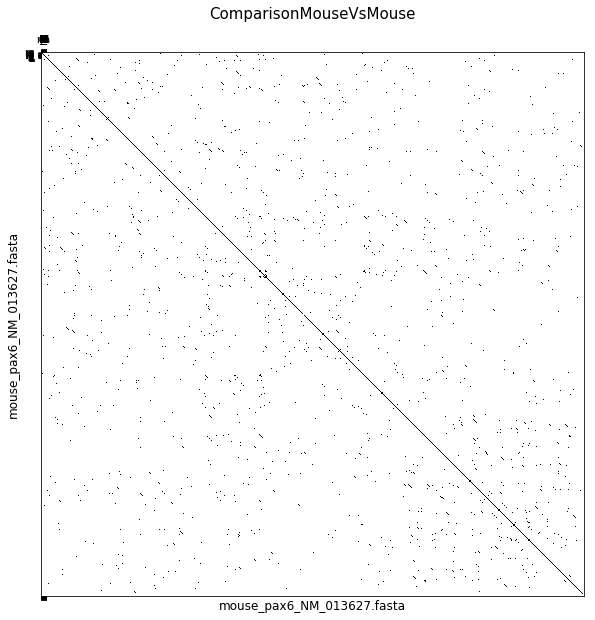

<Figure size 432x288 with 0 Axes>

In [14]:
%run dotplot_script.py 15 9 mouse_pax6_NM_013627.fasta mouse_pax6_NM_013627.fasta ComparisonMouseVsMouse Output_test.pdf

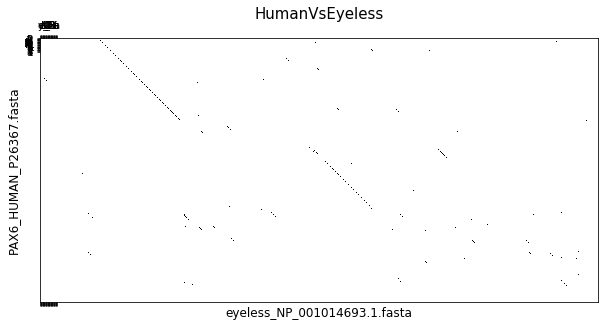

<Figure size 432x288 with 0 Axes>

In [15]:
%run dotplot_script.py 11 5 PAX6_HUMAN_P26367.fasta eyeless_NP_001014693.1.fasta HumanVsEyeless Output_test2.pdf


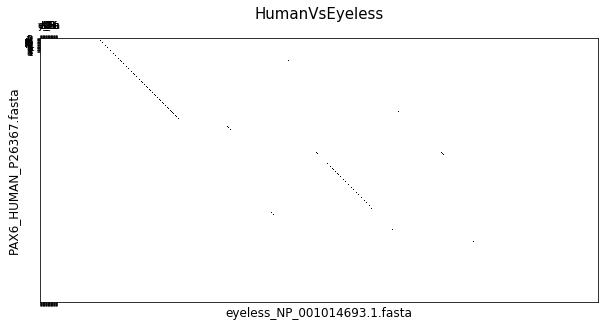

<Figure size 432x288 with 0 Axes>

In [16]:
%run dotplot_script.py 11 6 PAX6_HUMAN_P26367.fasta eyeless_NP_001014693.1.fasta HumanVsEyeless Output_test2.pdf

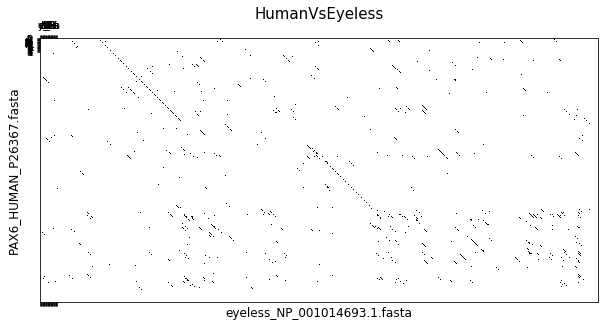

<Figure size 432x288 with 0 Axes>

In [17]:
%run dotplot_script.py 11 4 PAX6_HUMAN_P26367.fasta eyeless_NP_001014693.1.fasta HumanVsEyeless Output_test2.pdf

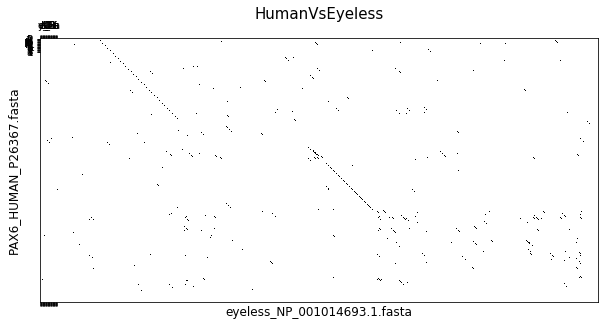

<Figure size 432x288 with 0 Axes>

In [18]:
%run dotplot_script.py 9 4 PAX6_HUMAN_P26367.fasta eyeless_NP_001014693.1.fasta HumanVsEyeless Output_test2.pdf

### Ex.3 (Optional: 2 pts) The Icosian Game
##### This is a 19th-century puzzle invented by the renowned Irish mathematician Sir William Hamilton (1805-1865) and presented to the worls as the "Icosian Game". The game was playes on a wooden board with holes representing major world cities and grooves representing connections between them. The object of the game was to find a circular route that would pass through all the cities exactly once before returning to the starting point. Nowadays such a route is known as a Hamiltonian circle. (Taken from: A. Levitin, M. Levitin Algorithmic Puzzles. Oxford University Press 2011)

##### Write a program to find all Hamiltonian circles starting and ending at R.

In [ ]:
def Hamiltonian_Circle2(start):
    adjacency={'B':['C','G','Z'],'C':['B','D','F'],'D':['C','F','M'],'F':['D','G','K'],\
               'G':['B','F','H'],'H':['G','J','X'],'J':['H','K','V'],'K':['F','J','L'],\
              'L':['K','M','T'],'M':['D','L','N'],'N':['M','P','S'],'P':['C','N','Q'],\
              'Q':['P','R','Z'],'R':['Q','S','W'],'S':['N','R','T'],'T':['L','S','V'],\
              'V':['J','T','W'],'W':['R','V','X'],'X':['H','W','Z'],'Z':['B','Q','X']}
    nodes=[key for key in adjacency]
    order=[start]
    n=1
    while n<len(nodes) and 

In [55]:
class TreeNode:
    def __init__(self,letter):
        self.letter=letter
        self.pre=None
        self.right=None
        self.middle=None
        self.left=None
        self.suc=None
        
    def set_predecessor(self,predecessor):
        #assert len(predecessor)==2 and type(predecessor)==list, 'Predecessor must be a list of length 2'
        self.pre=predecessor[0]
        self.right=self.pre[0]
        self.middle=self.pre[1]
        self.left=self.pre[2]
        return
    
    def set_successor(self,successor):
        self.suc=successor
        return 
    
class Tree:
    def __init__(self,letters):
        self.letters=letters
        self.nodes=[TreeNode(self.letters[i]) for i in range(len(self.letters))]
        self.root=self.set_root('R')
    
    def create_node(self,letter):
        node=TreeNode(letter)
        return node
    
    def set_root(self,letter): #take the node with letter R as root 
        index=self.letters.index(letter)
        root=self.nodes[index]
        return root
    
    def is_parent(self,letter2): #is letter2 a child of the current node?
        if letter2 in self.successor:
            return True
        else:
            return False
        
    def check_parent(self,letter2): #is letter2 a parent of the current node?
        if letter2 in self.predecessor:
            return True
        else:
            return False
        
    
    
    

In [56]:
adjacency={'B':['C','G','Z'],'C':['B','D','F'],'D':['C','F','M'],'F':['D','G','K'],\
               'G':['B','F','H'],'H':['G','J','X'],'J':['H','K','V'],'K':['F','J','L'],\
              'L':['K','M','T'],'M':['D','L','N'],'N':['M','P','S'],'P':['C','N','Q'],\
              'Q':['P','R','Z'],'R':['Q','S','W'],'S':['N','R','T'],'T':['L','S','V'],\
              'V':['J','T','W'],'W':['R','V','X'],'X':['H','W','Z'],'Z':['B','Q','X']}

tree=Tree([key for key in adjacency])

for node in tree.nodes:
    node.set_predecessor([adjacency[key] for key in adjacency if key==node.letter])
    
tree.root.left

'W'